In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
GI = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)


#Basic information about the graph
print("Graph Information:")
print("Number of nodes: ", nx.number_of_nodes(GI))
print("Number of edges: ", nx.number_of_edges(GI))
print("Is directed: ", nx.is_directed(GI))


#Basic graph statistics
print("\nGraph Statistics:")
print("Density: ", nx.density(GI))
print("Average degree: ", sum(dict(GI.degree()).values()) / len(GI))
print("Number of connected components: ", nx.number_connected_components(GI))
print("Size of the largest connected component: ", len(max(nx.connected_components(GI), key=len)))
print("Is connected: ", nx.is_connected(GI))

Graph Information:
Number of nodes:  4039
Number of edges:  88234
Is directed:  False

Graph Statistics:
Density:  0.010819963503439287
Average degree:  43.69101262688784
Number of connected components:  1
Size of the largest connected component:  4039
Is connected:  True


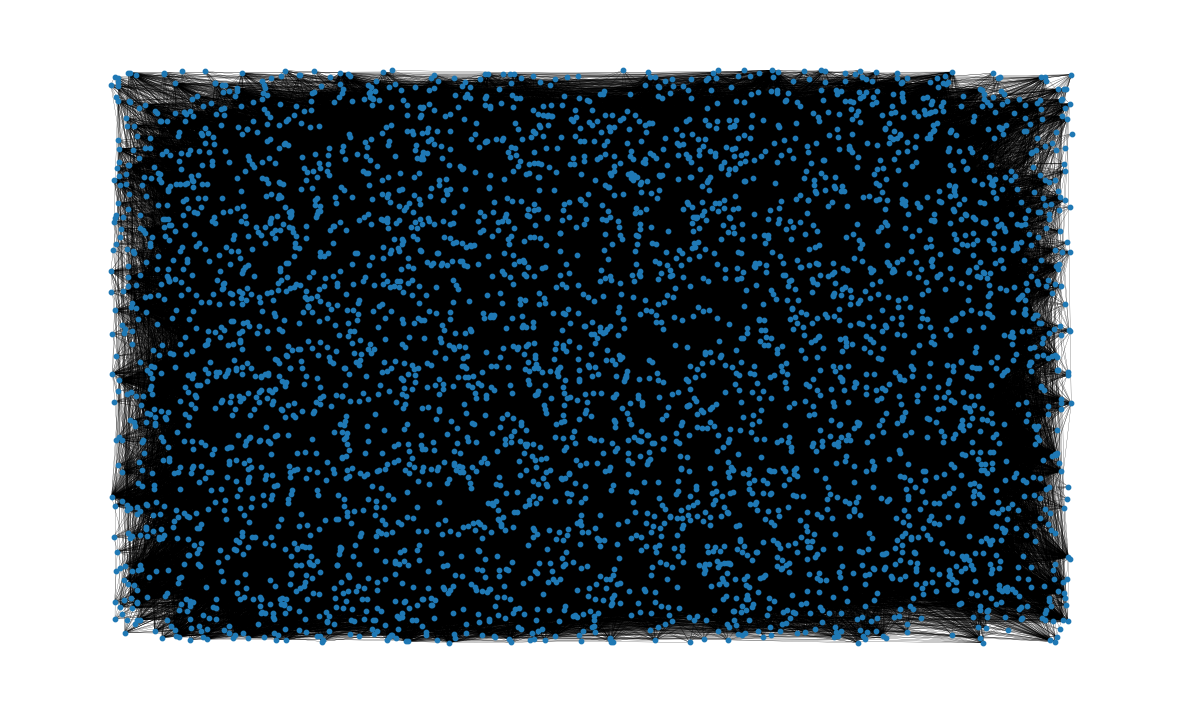

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(GI, pos=nx.random_layout(GI), ax=ax, **plot_options)

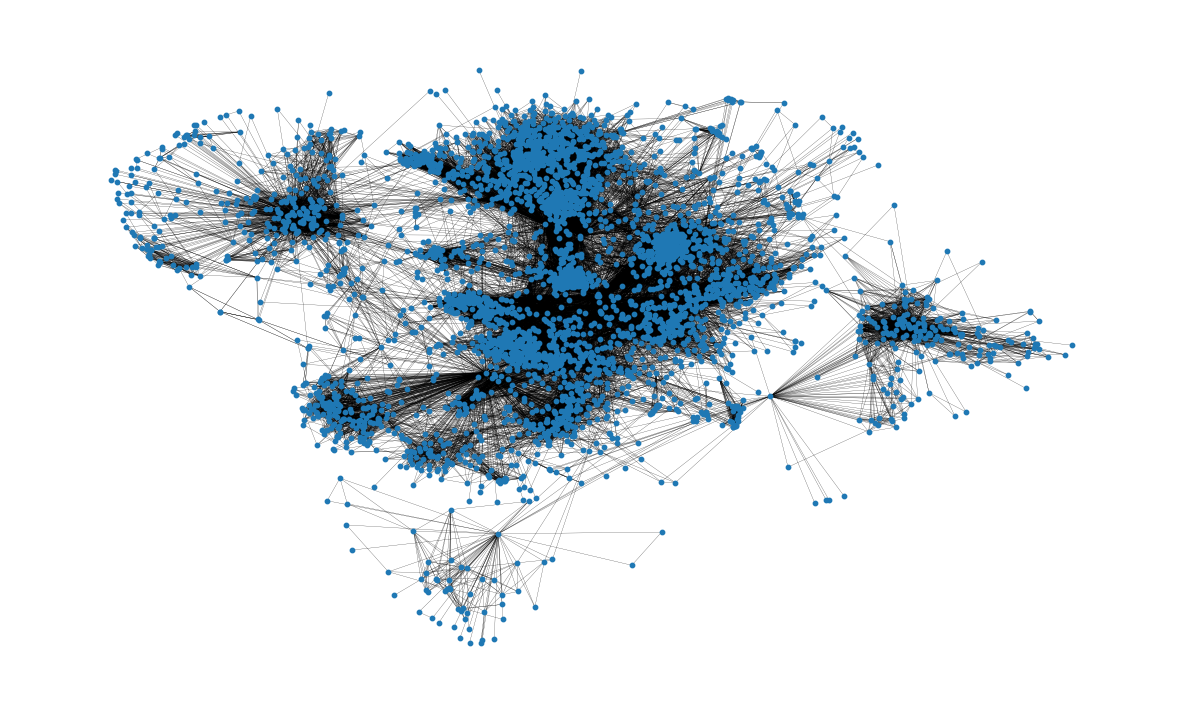

In [ ]:
pos = nx.spring_layout(GI, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(GI, pos=pos, ax=ax, **plot_options)

In [ ]:
import numpy as np

mean=np.mean([d for _, d in GI.degree()])
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(GI))
mean

43.69101262688784

In [ ]:
shortest_path_lengths[50][4000]

6

In [ ]:
diameter = max(nx.eccentricity(GI, sp=shortest_path_lengths).values())
diameter

8

In [ ]:
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
np.mean(average_path_lengths)

3.691592636562027

On a average a single node is connected to 44 other nodes.

In [ ]:
import networkx as nx
GI = nx.read_edgelist("facebook_combined.txt", nodetype=int)

source_node = int(input("Enter the source node: "))
target_node = int(input("Enter the target node: "))

shortest_path = nx.shortest_path(GI, source=source_node, target=target_node)

print(f"Shortest path between {source_node} and {target_node}: {shortest_path}")
print(f"Length of shortest path: {len(shortest_path) - 1}")


Enter the source node: 500
Enter the target node: 42
Shortest path between 500 and 42: [500, 348, 34, 0, 42]
Length of shortest path: 4


NODE: Nodes represent individual entity, in this case in our data it represents individuals.

EDGE: Edge is a connection between two nodes.

DIRECTED: For every netwokr the edge might or might not represent a direction in this network it is undirected.

DENSITY: Ratio of number of edges in the grpah to the total number of possible edges in the graph.

AVERAGE DEGREE: Total number of edges divided by total number of nodes.


---
"Node importance" also knowm as node centrality is a measure of how crucial a node can be in forming the network or graph.
There are quite a few ways to know the node importance in networks but in this project we are limiting it to four, they are:
1. Degree centrality
2. Betweenness centrality
3. Closeness centrality
4. Community detection

----

Degree Centrality


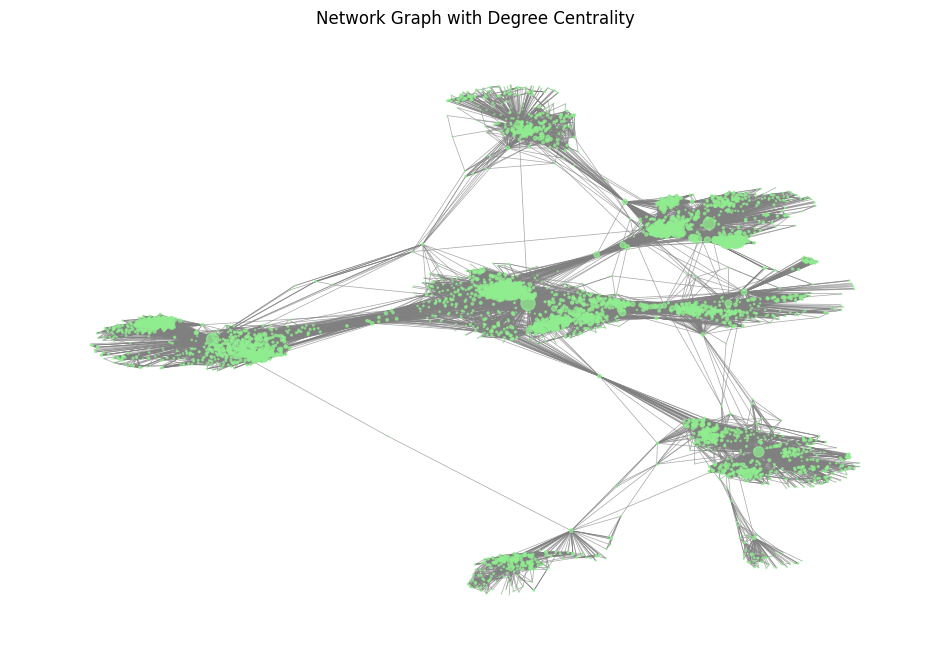

'\nnx.draw_networkx(G, pos, node_color=node_color, node_size=node_size,\n                 edge_color=edge_color, width=edge_width, alpha=0.7, with_labels=False) \nplt.title("Network Graph with Degree Centrality")\nplt.axis(\'off\')\nplt.show()\n'

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

degree_centrality = nx.degree_centrality(G)

pos = nx.spring_layout(G, seed=42)
node_color = 'lightgreen'
node_size = [v * 400 for v in degree_centrality.values()]
edge_color = 'gray'
edge_width = 0.5
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, node_color=node_color, node_size=node_size,
                 edge_color=edge_color, width=edge_width, alpha=0.7, with_labels=False)
plt.title("Network Graph with Degree Centrality")
plt.axis('off')
plt.show()

"""
nx.draw_networkx(G, pos, node_color=node_color, node_size=node_size,
                 edge_color=edge_color, width=edge_width, alpha=0.7, with_labels=False)
plt.title("Network Graph with Degree Centrality")
plt.axis('off')
plt.show()
"""
# the above code chunk shows degree centrality for each node but it is not compatible to show in the output block.


In [ ]:
degree_centrality = nx.centrality.degree_centrality(
    GI
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317),
 (1800, 0.06067360079247152),
 (1663, 0.058197127290737984)]

In [ ]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254),
 (1800, 245),
 (1663, 235)]

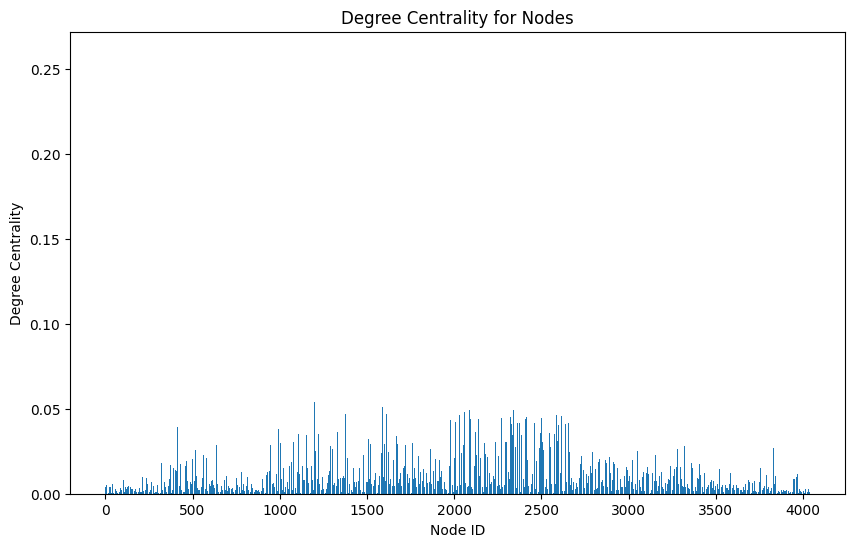

In [ ]:
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

degree_centrality = nx.degree_centrality(G)

plt.figure(figsize=(10, 6))
plt.bar(degree_centrality.keys(), degree_centrality.values())
plt.xlabel("Node ID")
plt.ylabel("Degree Centrality")
plt.title("Degree Centrality for Nodes")
plt.show()

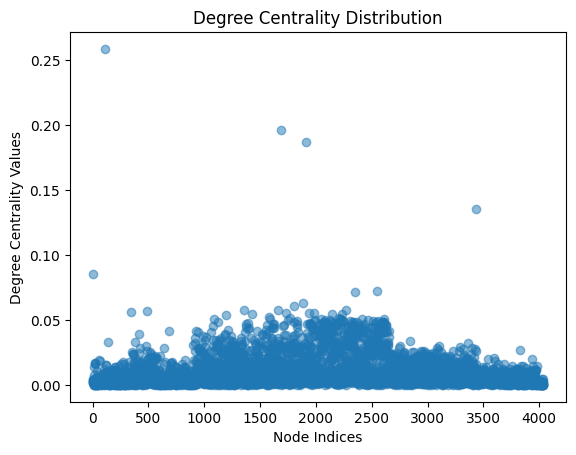

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)
degree_centrality = nx.degree_centrality(G)
nodes = list(degree_centrality.keys())
degree_values = list(degree_centrality.values())
plt.scatter(nodes, degree_values, alpha=0.5)
plt.xlabel("Node Indices")
plt.ylabel("Degree Centrality Values")
plt.title("Degree Centrality Distribution")
plt.show()


---
Betweenness Centrality


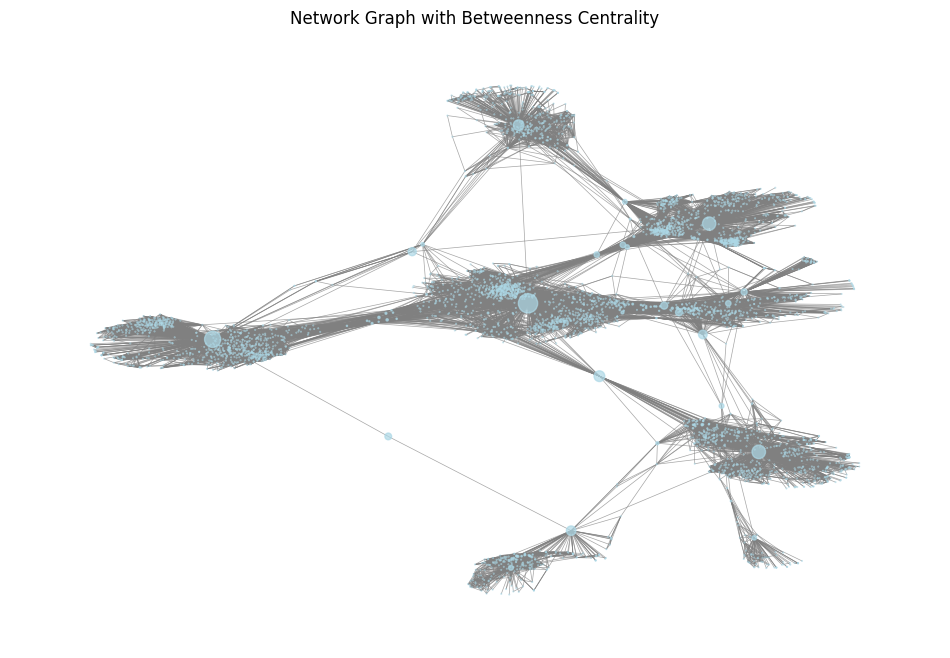

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=True)

pos = nx.spring_layout(G, seed=42)
node_color = 'lightblue'
node_size = [v * 400 for v in betweenness_centrality.values()]
edge_color = 'gray'
edge_width = 0.5
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, node_color=node_color, node_size=node_size,
                 edge_color=edge_color, width=edge_width, alpha=0.7, with_labels=False)
plt.title("Network Graph with Betweenness Centrality")
plt.axis('off')
plt.show()


(-0.6742176313698292,
 0.4846063454449177,
 -1.1929986491799354,
 1.0310810223221778)

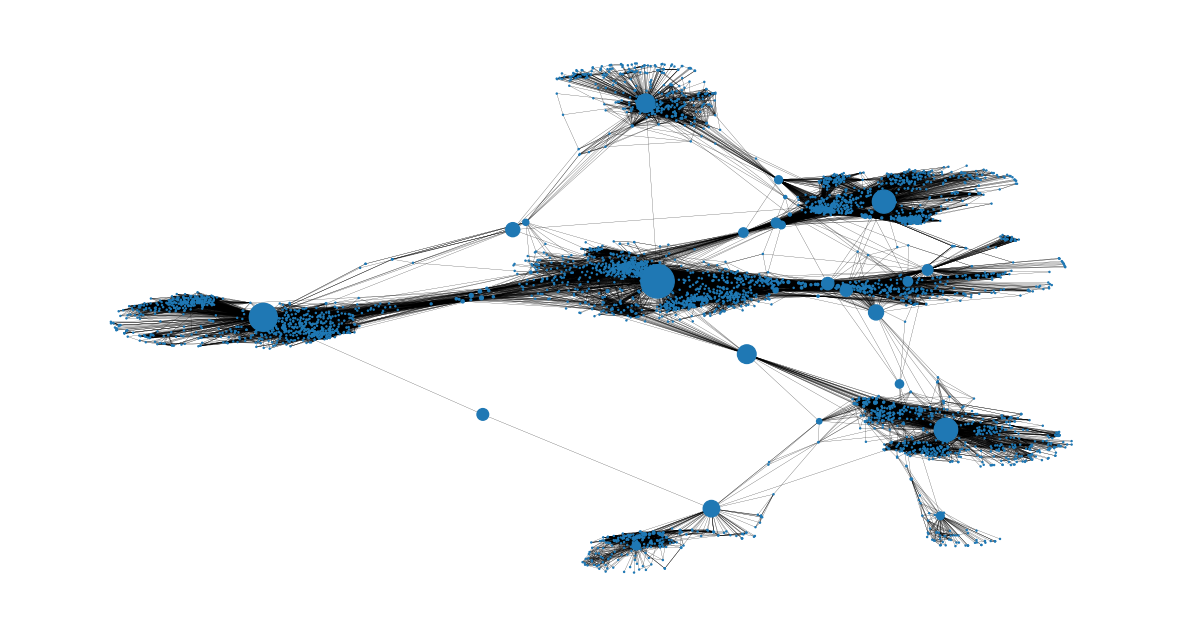

In [ ]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]
plt.figure(figsize=(15, 8))
nx.draw_networkx(GI, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [ ]:

(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(107, 0.48077531149557645),
 (1684, 0.33812535393929544),
 (3437, 0.23649361170042005),
 (1912, 0.22967697101070242),
 (1085, 0.14943647607698152),
 (0, 0.14672864694039878),
 (698, 0.1157685138598761),
 (567, 0.0967578131045644),
 (58, 0.08481360516228129),
 (428, 0.06477239041384117)]

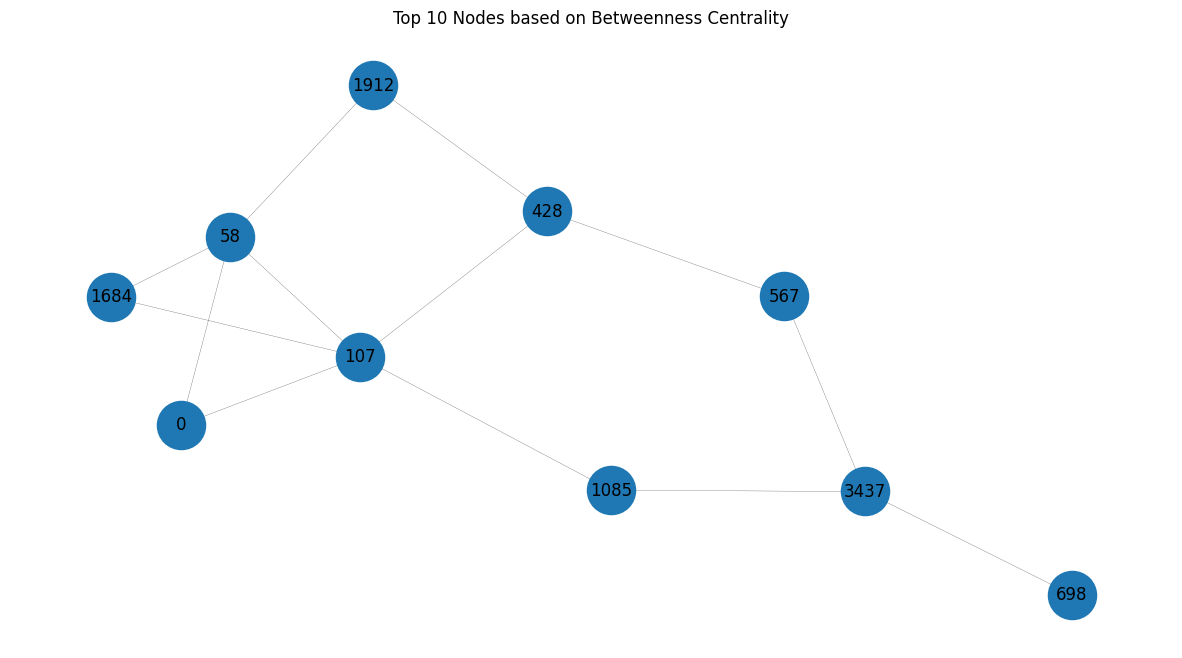

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=True)

# Sort the nodes by betweenness centrality in descending order
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Get the top 10 nodes with highest betweenness centrality
top_nodes = sorted_nodes[:10]

# Extract the subgraph containing only the top 10 nodes
subgraph = G.subgraph(top_nodes)

# Visualize the subgraph with labels
pos = nx.spring_layout(subgraph)
node_size = 1200
plt.figure(figsize=(15, 8))
nx.draw_networkx(subgraph, pos=pos, node_size=node_size, with_labels=True, width=0.15)
plt.axis("off")
plt.title("Top 10 Nodes based on Betweenness Centrality")
plt.show()



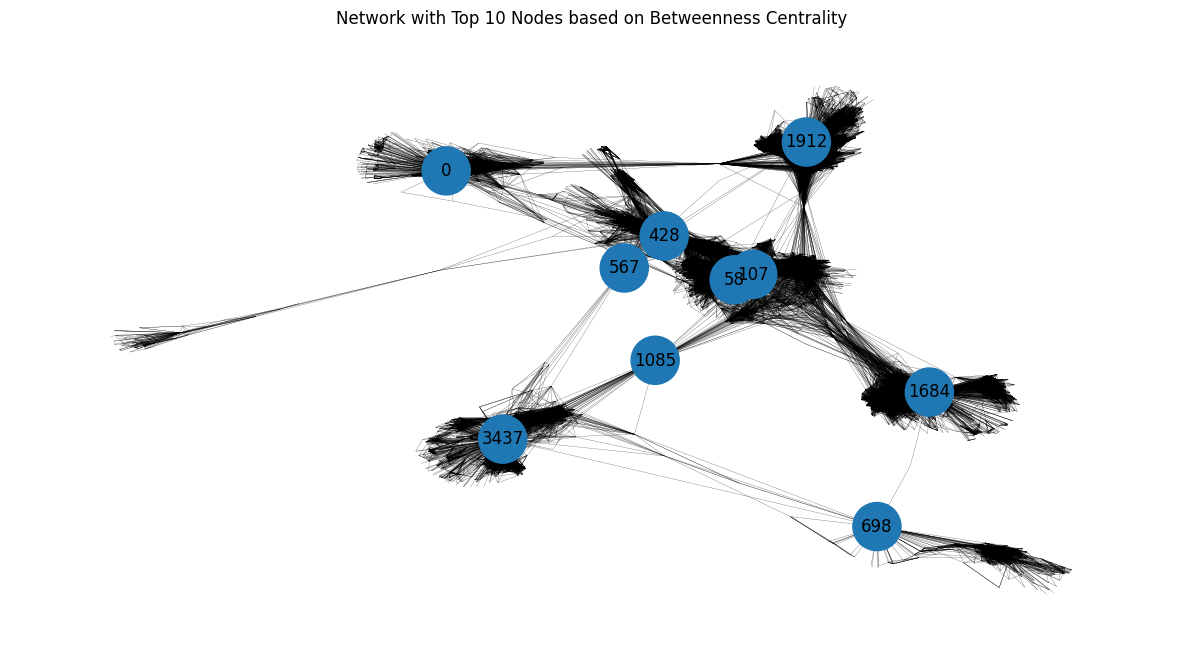

In [ ]:
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

top_nodes = sorted_nodes[:10]


node_size = [
    1200 if node in top_nodes else 0 for node in G.nodes()
]

labels = {node: node if node in top_nodes else "" for node in G.nodes()}

pos = nx.spring_layout(G)
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, labels=labels, font_size=12, font_color='black', width=0.15)
plt.axis("off")
plt.title("Network with Top 10 Nodes based on Betweenness Centrality")
plt.show()

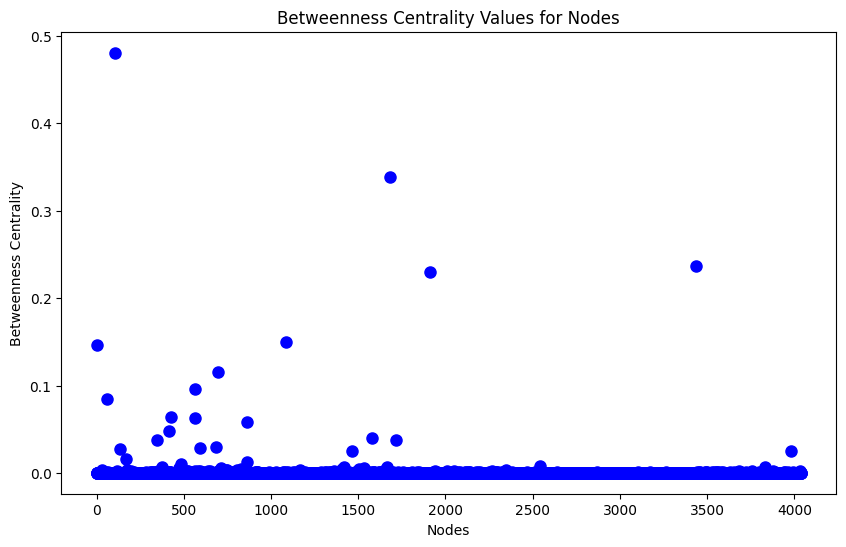

In [ ]:
nodes = list(betweenness_centrality.keys())
values = list(betweenness_centrality.values())

plt.figure(figsize=(10, 6))
plt.plot(nodes, values, 'bo', markersize=8)
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality Values for Nodes')
plt.show()

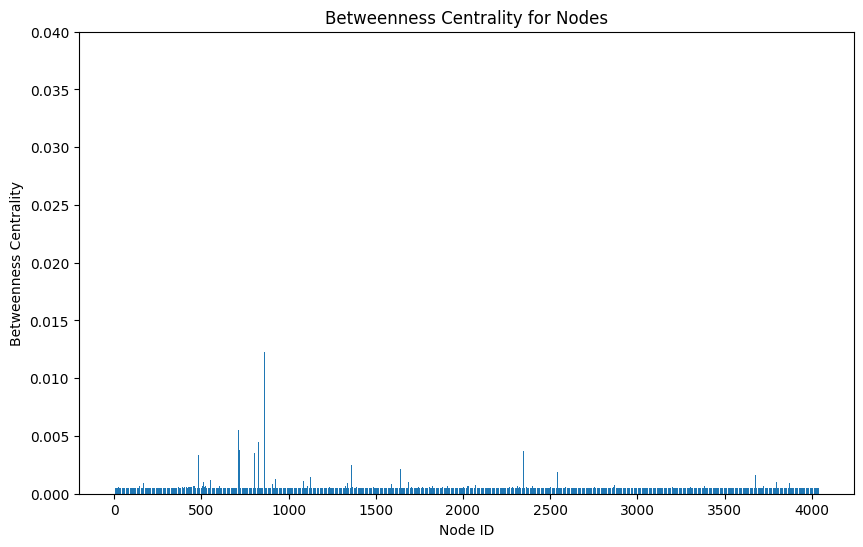

In [ ]:
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

plt.figure(figsize=(10, 6))
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
plt.xlabel("Node ID")
plt.ylabel("Betweenness Centrality")
plt.title("Betweenness Centrality for Nodes")
plt.ylim(0, 0.04)
plt.show()


---
Closeness centrality

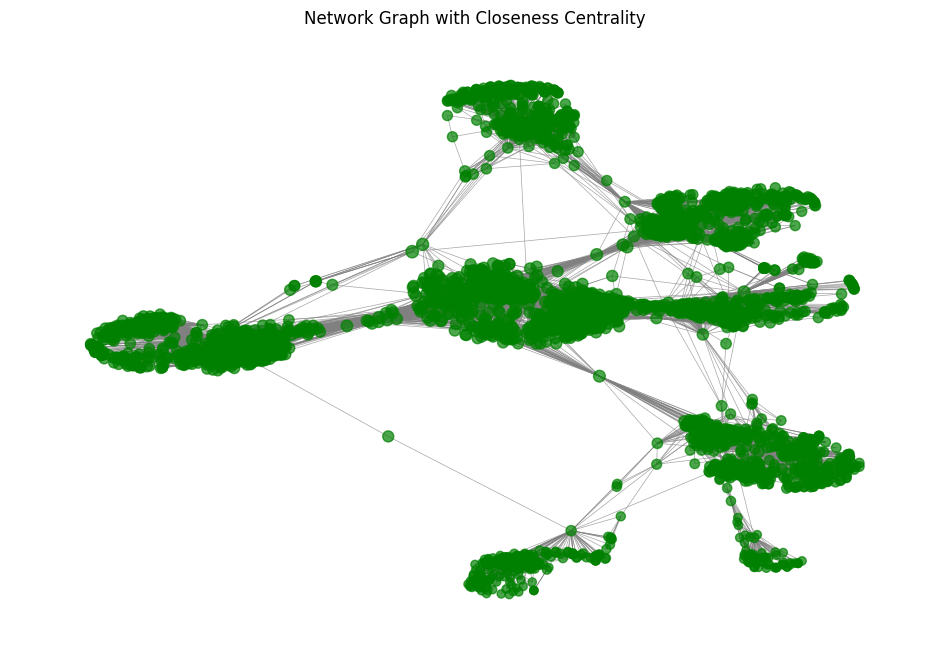

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

closeness_centrality = nx.closeness_centrality(G)

pos = nx.spring_layout(G, seed=42)
node_color = 'green'
node_size = [v * 200 for v in closeness_centrality.values()]
edge_color = 'gray'
edge_width = 0.5
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, node_color=node_color, node_size=node_size,
                 edge_color=edge_color, width=edge_width, alpha=0.7, with_labels=False)
plt.title("Network Graph with Closeness Centrality")
plt.axis('off')
plt.show()


In [ ]:
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739),
 (414, 0.3695433330282786),
 (376, 0.36655773420479304)]

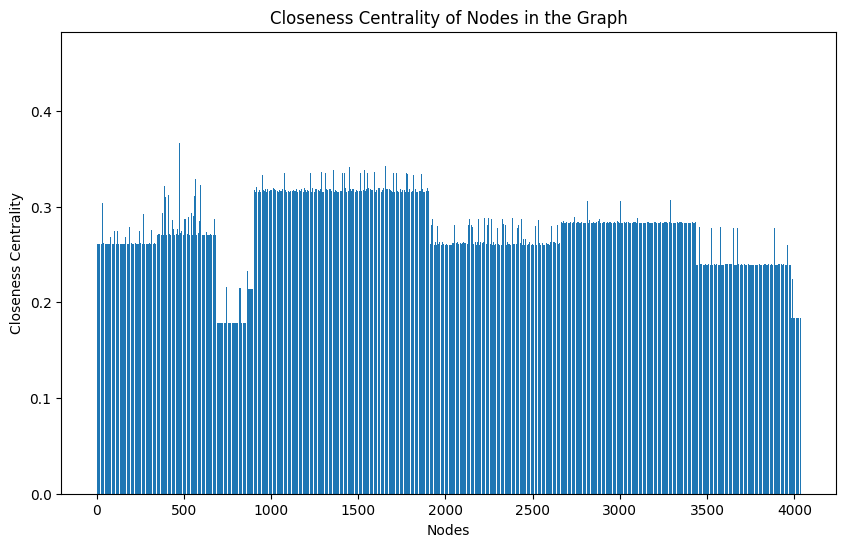

In [ ]:
nodes = list(closeness_centrality.keys())
closeness_values = list(closeness_centrality.values())

# Create a graph plot
plt.figure(figsize=(10, 6))
plt.bar(nodes, closeness_values)
plt.xlabel("Nodes")
plt.ylabel("Closeness Centrality")
plt.title("Closeness Centrality of Nodes in the Graph")
plt.show()

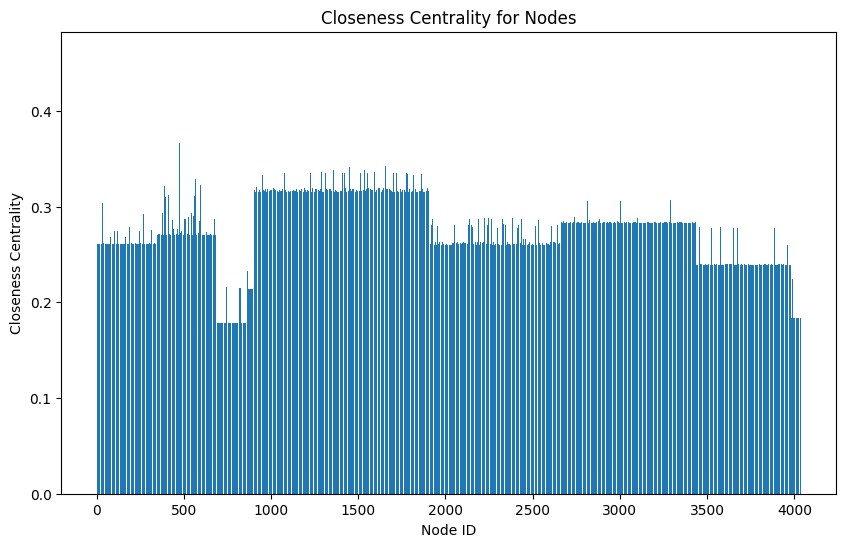

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

closeness_centrality = nx.closeness_centrality(G)

plt.figure(figsize=(10, 6))
plt.bar(closeness_centrality.keys(), closeness_centrality.values())
plt.xlabel("Node ID")
plt.ylabel("Closeness Centrality")
plt.title("Closeness Centrality for Nodes")
plt.show()


---
Communit Detection

Community 0: Nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,

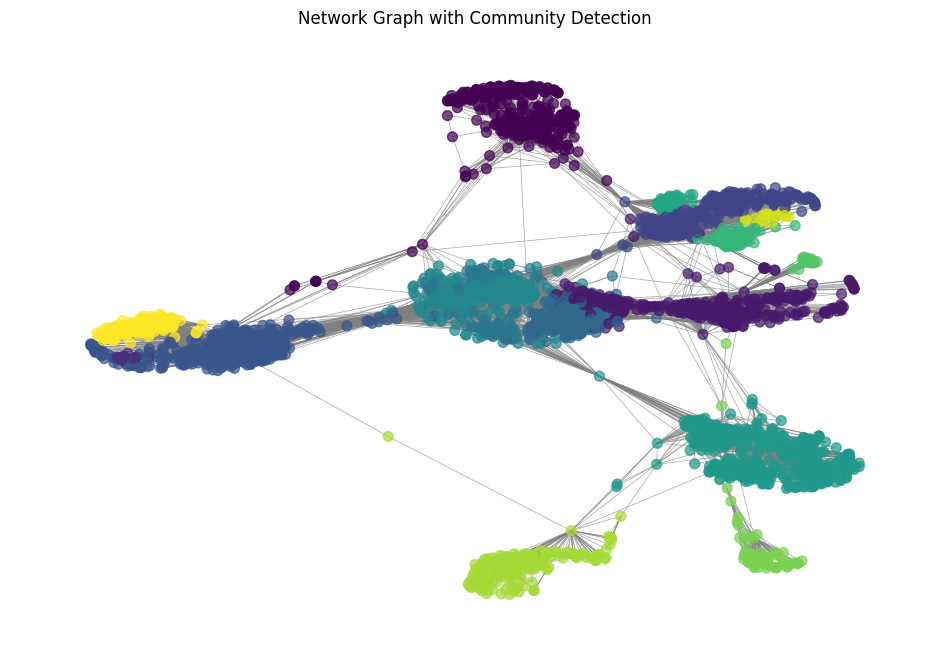

In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt
import community.community_louvain as cl

G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

partition = cl.best_partition(G)

communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

for community_id, nodes in communities.items():
    print(f"Community {community_id}: Nodes {nodes}")

pos = nx.spring_layout(G, seed=42)
node_color = [partition[node] for node in G.nodes()]
node_size = 50
edge_color = 'gray'
edge_width = 0.5
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, node_color=node_color, node_size=node_size,
                 edge_color=edge_color, width=edge_width, alpha=0.7, with_labels=False)
plt.title("Network Graph with Community Detection")
plt.axis('off')
plt.show()


In [ ]:
colors = ["" for x in range(G.number_of_nodes())]
for com in nx.community.asyn_fluidc(G, 8, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color

NameError: ignored